In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [205]:
df = pd.read_csv("new_data.csv",header=None)

In [206]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Class1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Class1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Class1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Class1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Class1


In [207]:
df[df.columns[-1]].unique()

array(['Class1', 'Class2'], dtype=object)

In [208]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Class1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Class1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Class1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Class1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Class1


In [209]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [221]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [222]:
target_names = ['Class1','Class2']
accuracies = []
precisions = []

## Naive Bayes

In [223]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

      Class1       0.65      0.71      0.68        21
      Class2       0.68      0.62      0.65        21

    accuracy                           0.67        42
   macro avg       0.67      0.67      0.67        42
weighted avg       0.67      0.67      0.67        42

Correctly Classified Instances: 28
Incorrectly Classified Instances: 14
Total Number of Instances: 42


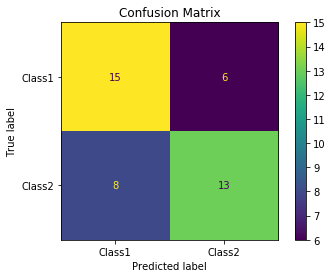

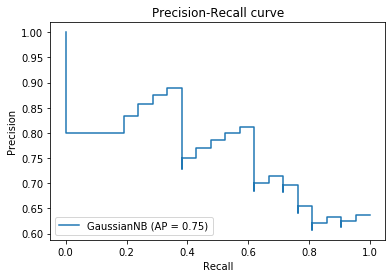

In [224]:
print(classification_report(y_test, y_pred, target_names=target_names))
print("Correctly Classified Instances:",(y_test == y_pred).sum())
print("Incorrectly Classified Instances:",(y_test != y_pred).sum())
print("Total Number of Instances:",(len(X_test)))

accuracies.append(accuracy_score(y_test, y_pred))
precisions.append(precision_score(y_test, y_pred,pos_label="Class1"))

plot_confusion_matrix(gnb, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

plot_precision_recall_curve(gnb, X_test, y_test)
plt.title("Precision-Recall curve")
plt.show()

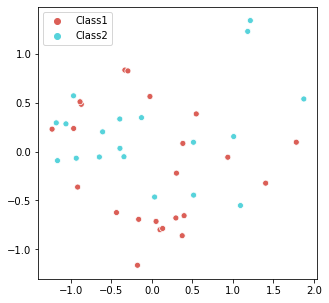

In [225]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_test)
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=y_pred,palette=sns.color_palette("hls", 2),legend="full")
plt.show()

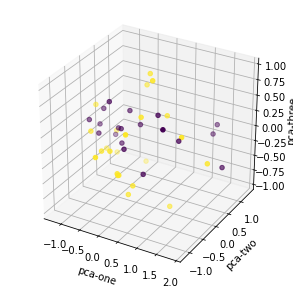

In [226]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=np.where(y_pred=='Class1',1,0)
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## SVM

In [227]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

      Class1       0.93      0.62      0.74        21
      Class2       0.71      0.95      0.82        21

    accuracy                           0.79        42
   macro avg       0.82      0.79      0.78        42
weighted avg       0.82      0.79      0.78        42

Correctly Classified Instances: 33
Incorrectly Classified Instances: 9
Total Number of Instances: 42


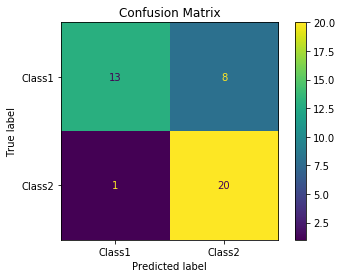

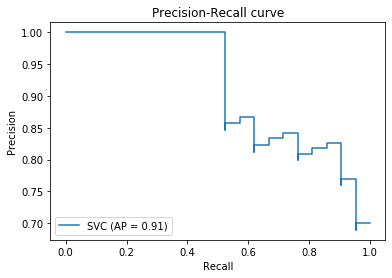

In [228]:
print(classification_report(y_test, y_pred, target_names=target_names))
print("Correctly Classified Instances:",(y_test == y_pred).sum())
print("Incorrectly Classified Instances:",(y_test != y_pred).sum())
print("Total Number of Instances:",(len(X_test)))

accuracies.append(accuracy_score(y_test, y_pred))
precisions.append(precision_score(y_test, y_pred,pos_label="Class1"))

plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

plot_precision_recall_curve(clf, X_test, y_test)
plt.title("Precision-Recall curve")
plt.show()

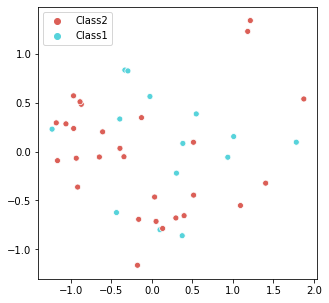

In [229]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_test)
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=y_pred,palette=sns.color_palette("hls", 2),legend="full")
plt.show()

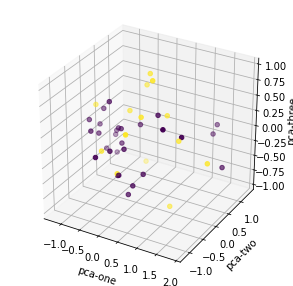

In [230]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=np.where(y_pred=='Class1',1,0)
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Random Forest Classifier

In [231]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

      Class1       0.94      0.76      0.84        21
      Class2       0.80      0.95      0.87        21

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42

Correctly Classified Instances: 36
Incorrectly Classified Instances: 6
Total Number of Instances: 42


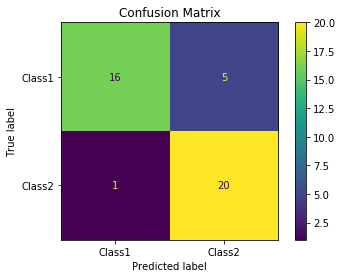

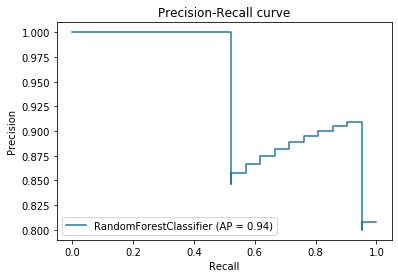

In [232]:
print(classification_report(y_test, y_pred, target_names=target_names))
print("Correctly Classified Instances:",(y_test == y_pred).sum())
print("Incorrectly Classified Instances:",(y_test != y_pred).sum())
print("Total Number of Instances:",(len(X_test)))

accuracies.append(accuracy_score(y_test, y_pred))
precisions.append(precision_score(y_test, y_pred,pos_label="Class1"))

plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

plot_precision_recall_curve(clf, X_test, y_test)
plt.title("Precision-Recall curve")
plt.show()

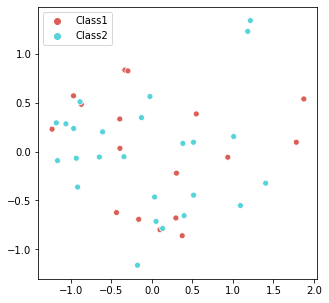

In [233]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_test)
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=y_pred,palette=sns.color_palette("hls", 2),legend="full")
plt.show()

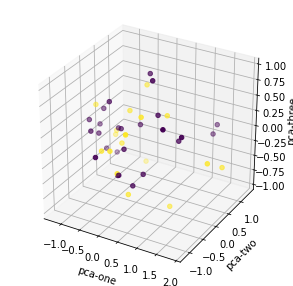

In [234]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=np.where(y_pred=='Class1',1,0)
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Decision Tree

In [235]:
clf = DecisionTreeClassifier(random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

      Class1       0.88      0.67      0.76        21
      Class2       0.73      0.90      0.81        21

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.80      0.79      0.78        42

Correctly Classified Instances: 33
Incorrectly Classified Instances: 9
Total Number of Instances: 42


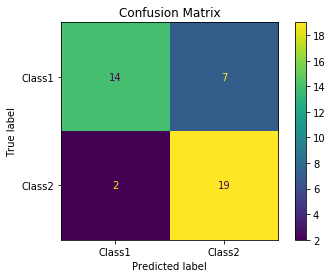

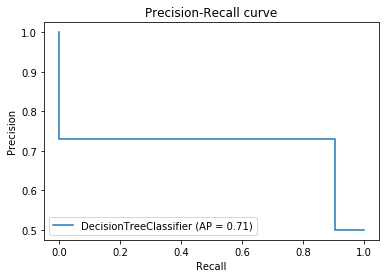

In [236]:
print(classification_report(y_test, y_pred, target_names=target_names))
print("Correctly Classified Instances:",(y_test == y_pred).sum())
print("Incorrectly Classified Instances:",(y_test != y_pred).sum())
print("Total Number of Instances:",(len(X_test)))

accuracies.append(accuracy_score(y_test, y_pred))
precisions.append(precision_score(y_test, y_pred,pos_label="Class1"))

plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

plot_precision_recall_curve(clf, X_test, y_test)
plt.title("Precision-Recall curve")
plt.show()

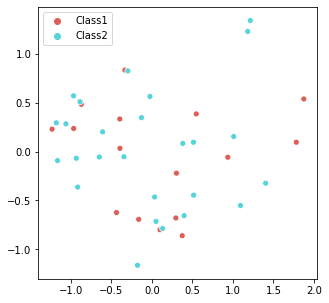

In [243]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_test)
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],hue=y_pred,palette=sns.color_palette("hls", 2),legend="full")
plt.show()

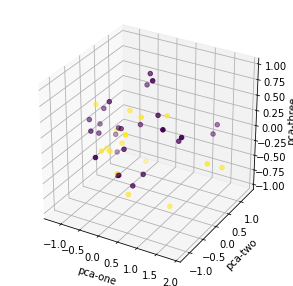

In [238]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=np.where(y_pred=='Class1',1,0)
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [242]:
print(accuracies)
print(precisions)

[0.6666666666666666, 0.7857142857142857, 0.8571428571428571, 0.7857142857142857]
[0.6521739130434783, 0.9285714285714286, 0.9411764705882353, 0.875]


Text(0, 0.5, 'Accuracy')

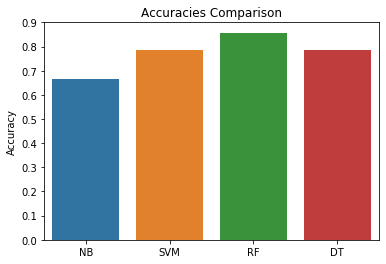

In [240]:
# plt.bar(['NB','SVM','RF'],accuracies)a
sns.barplot(x=['NB','SVM','RF','DT'],y=accuracies)
plt.title("Accuracies Comparison")
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Precision')

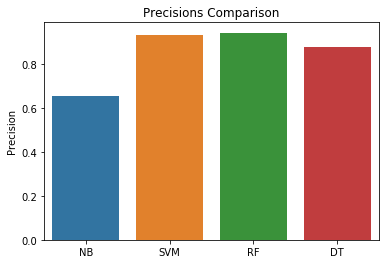

In [241]:
sns.barplot(x=['NB','SVM','RF','DT'],y=precisions)
plt.title("Precisions Comparison")
plt.ylabel('Precision')
plt.show()